# **Data Preparation**

In [2]:
# Installing dataset and xgboost
!pip install ucimlrepo
!pip install xgboost

In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import seaborn as sns


In [4]:
import ssl
from urllib.request import urlopen

# fetch the dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Setting the data
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


pd.set_option('display.max_columns', None)  # to display all columns

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [5]:
#Load and display a dataset to provide an overview of its structure and values.
X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
#Display the "Diagnosis" column from the dataset, which indicates the classification of the samples.
#'M' represents malignant and 'B' represents benign cases. This column serves as the target variable for classification tasks.
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [7]:
# Transforming y from a pd dataframe to a pd series
y = y['Diagnosis']
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


## Checking for null values

In [8]:
#Check for missing values in both the feature set (`X`) and the target variable (`y`).
#This step is essential for data preprocessing to avoid issues during model training caused by incomplete data.
import pandas as pd

# Assuming X and y are already defined and are pandas DataFrame/Series
null_counts = pd.DataFrame({
    "Feature": list(X.columns) + ["y"],
    "Null_Counts": list(X.isnull().sum()) + [y.isnull().sum()]
})

print(null_counts)


               Feature  Null_Counts
0              radius1            0
1             texture1            0
2           perimeter1            0
3                area1            0
4          smoothness1            0
5         compactness1            0
6           concavity1            0
7      concave_points1            0
8            symmetry1            0
9   fractal_dimension1            0
10             radius2            0
11            texture2            0
12          perimeter2            0
13               area2            0
14         smoothness2            0
15        compactness2            0
16          concavity2            0
17     concave_points2            0
18           symmetry2            0
19  fractal_dimension2            0
20             radius3            0
21            texture3            0
22          perimeter3            0
23               area3            0
24         smoothness3            0
25        compactness3            0
26          concavity3      

# Data Analysis and Visualization

Diagnosis
B    357
M    212
Name: count, dtype: int64


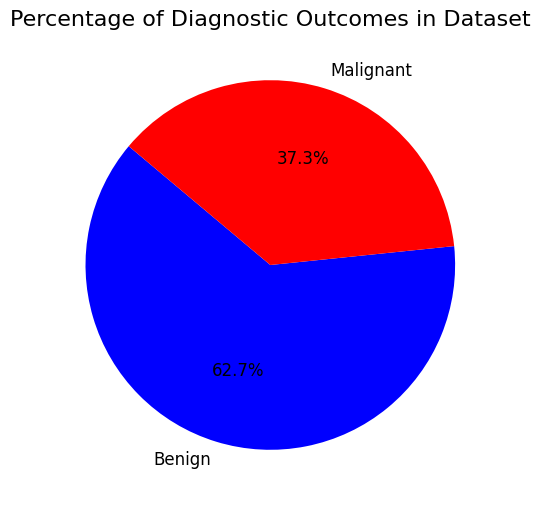

In [9]:
#Analyze the distribution of diagnostic outcomes ('B' for benign, 'M' for malignant) in the dataset.
#The code calculates the percentage of each diagnosis and visualizes it as a pie chart for a better understanding
#of the dataset's class distribution, which is crucial for evaluating class imbalance.

diagnosis_counts = y.value_counts()
print(diagnosis_counts)
total_samples = len(y)
percent_benign = (diagnosis_counts['B'] / total_samples) * 100
percent_malignant = (diagnosis_counts['M'] / total_samples) * 100

# Calculate percentages
percentages = [percent_benign, percent_malignant]
labels = ['Benign', 'Malignant']
colors = ['blue', 'red']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})

# Setting the title
plt.title('Percentage of Diagnostic Outcomes in Dataset', fontsize=16)

# Show the plot
plt.show()


## Balancing the Data

Diagnosis
M    357
B    357
Name: count, dtype: int64


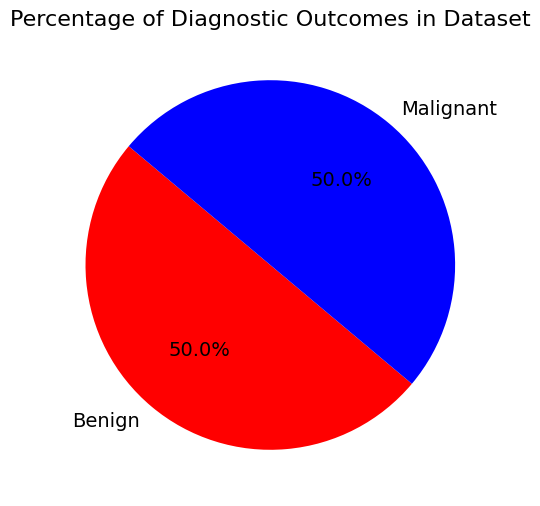

In [10]:
from imblearn.over_sampling import RandomOverSampler

# Assuming X and y are already defined
X, y = RandomOverSampler(random_state=10).fit_resample(X, y)

diagnosis_counts = y.value_counts()
print(diagnosis_counts)
total_samples = len(y)
percent_benign = (diagnosis_counts['B'] / total_samples) * 100
percent_malignant = (diagnosis_counts['M'] / total_samples) * 100

# Data for the pie chart
labels = ['Benign', 'Malignant']
sizes = [percent_benign, percent_malignant]
colors = ['red', 'blue']


fig, ax = plt.subplots(figsize=(8, 6))

# Creating the pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 14})

# Setting the title
plt.title('Percentage of Diagnostic Outcomes in Dataset', fontsize=16)

# Show the plot
plt.show()


Now that the numer of classes is balanced, we ensured that the models we're going to build are not going to be biased towards any class.

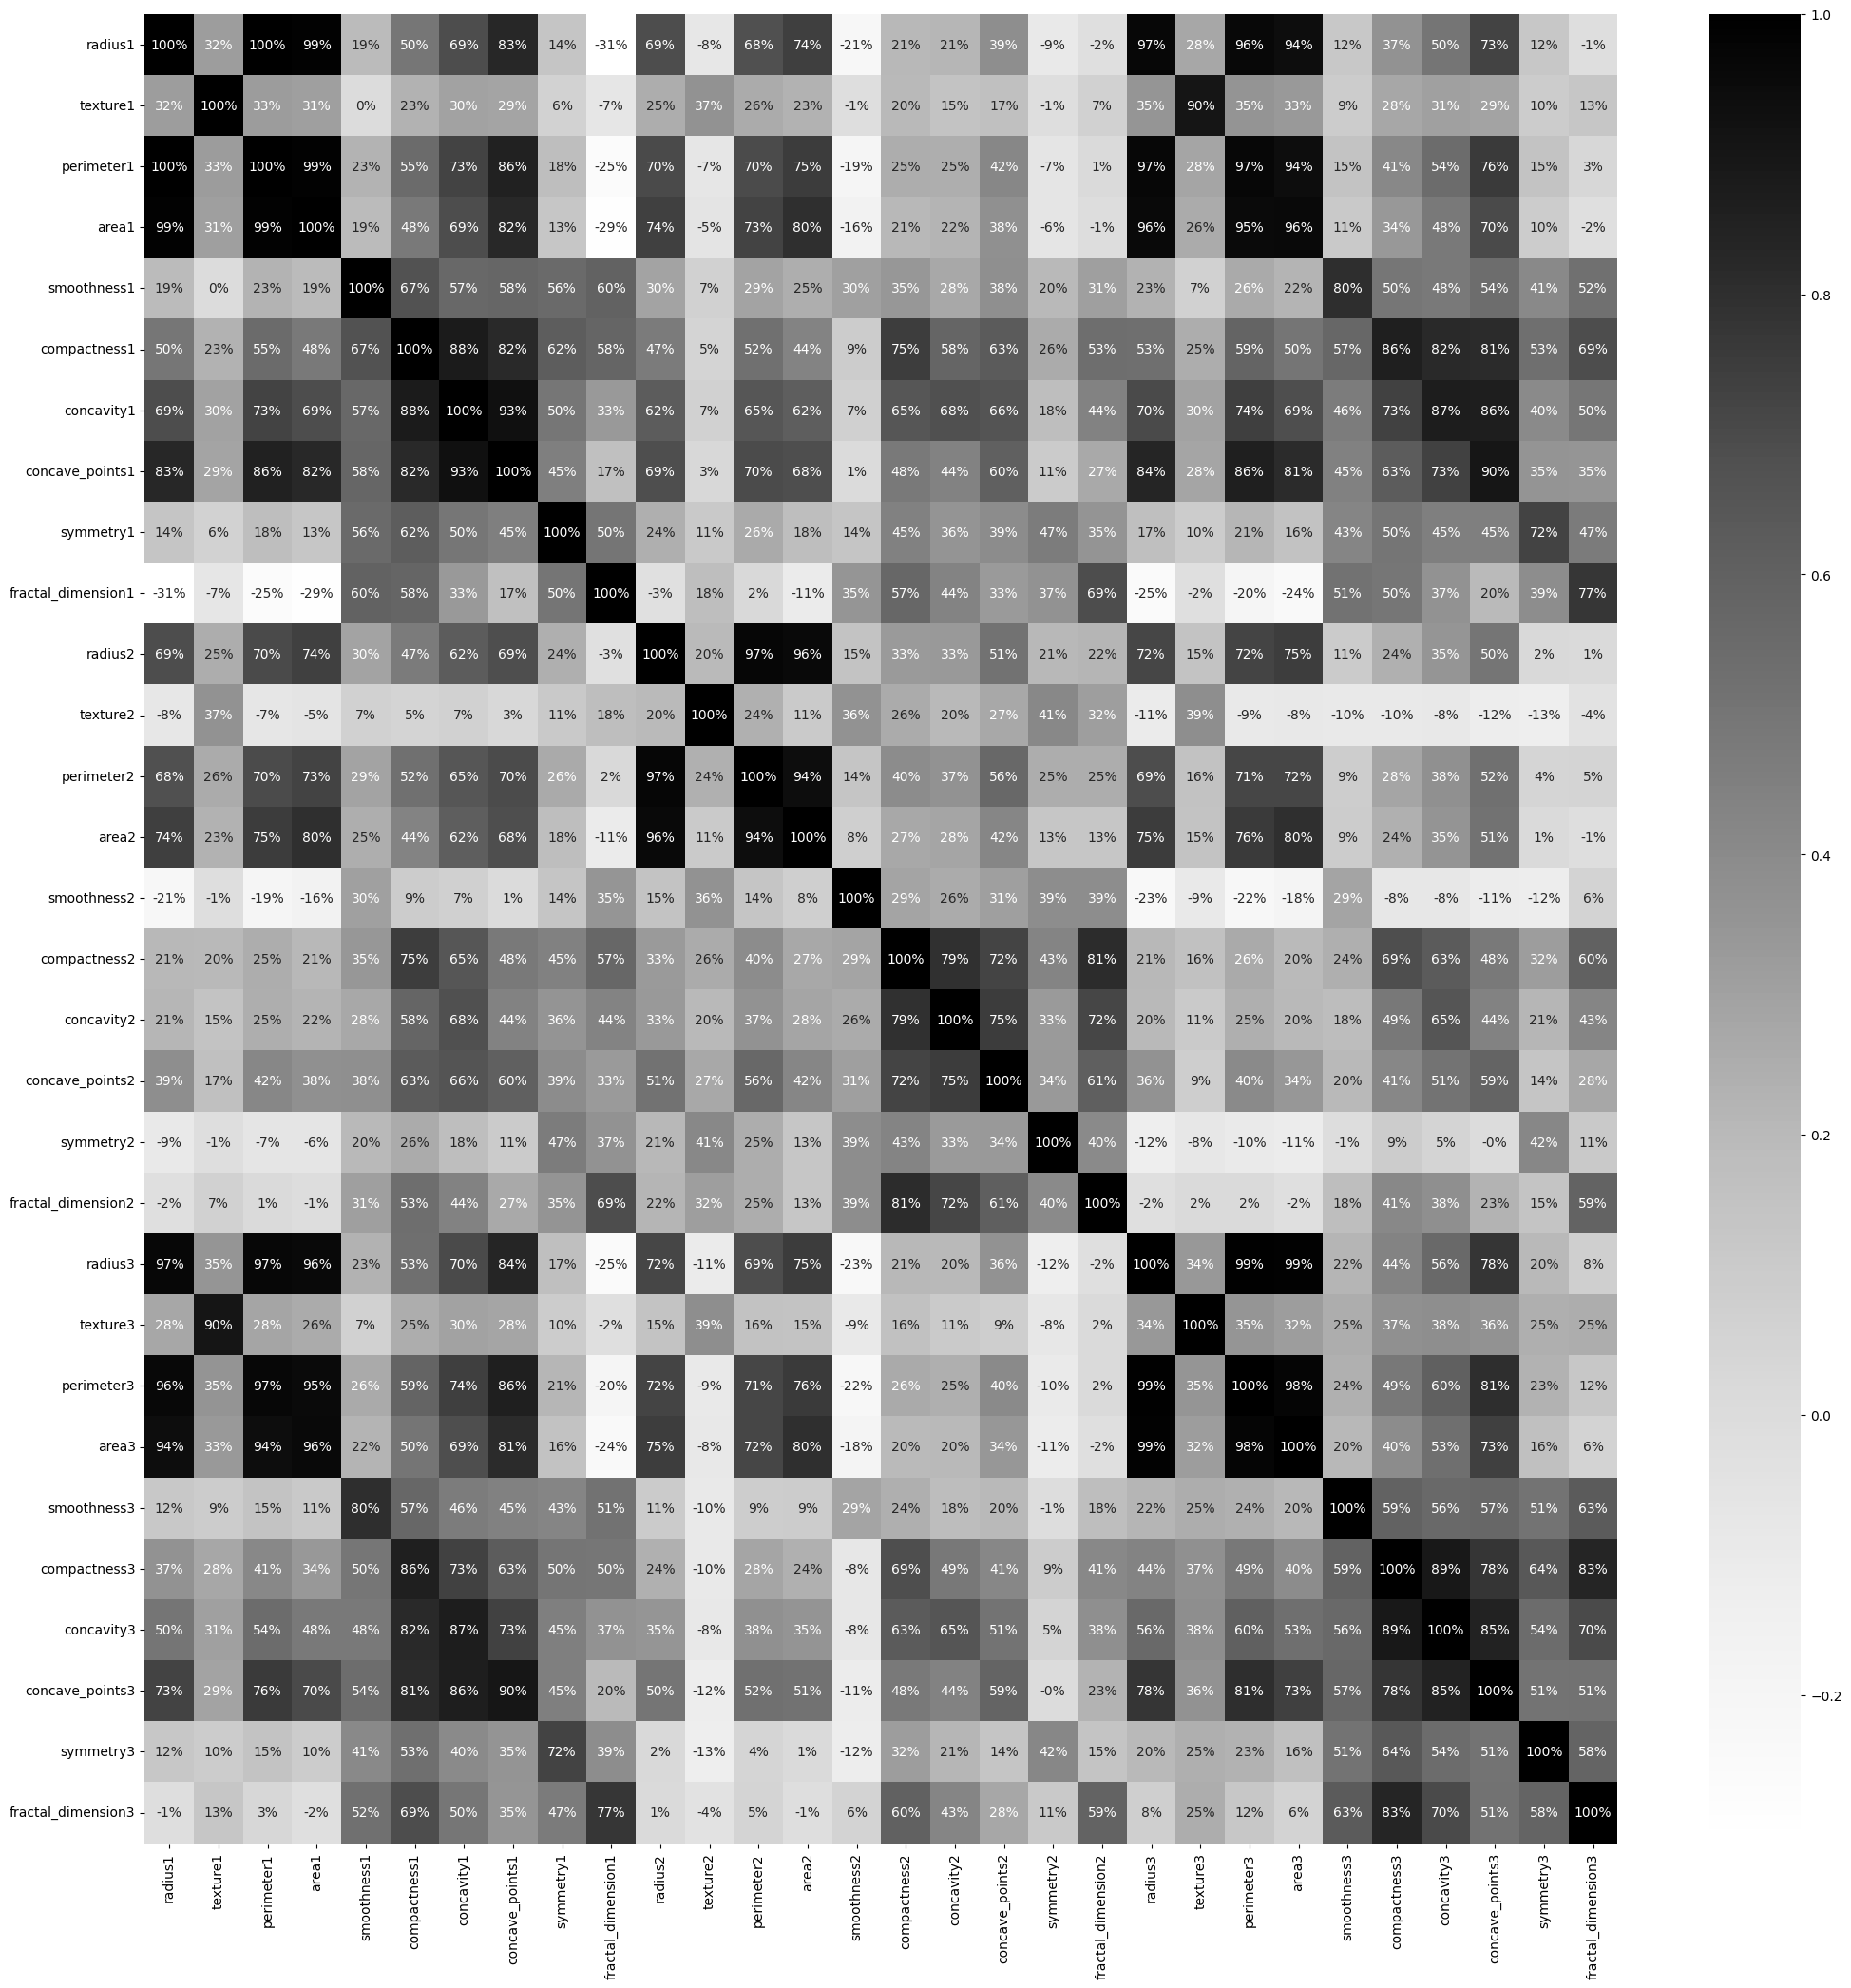

In [11]:
#Compute and visualize the correlation matrix for the features in the dataset.
#The correlation matrix helps identify relationships between features, highlighting potential redundancies or dependencies.
#The heatmap provides a visual representation, making it easier to spot strongly correlated pairs of features.

# Getting the correlation between columns
correlation_matrix = X.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt='.0%', cmap='Greys')
plt.show()


# Data preprocessing

In [12]:
#Display the data types of the features in `X` and the target variable `y`.
#This step ensures that all features have the correct data type for analysis and model training.
#Numeric features should typically be of type `float64` or `int64`, while categorical targets may be of type `object` or `category`.

print(X.dtypes)
print("y: ", y.dtypes)

radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
dtype: object
y:  object


In [13]:
#Encode the target variable `y` (diagnosis) into numeric form using Label Encoding.
#'M' (Malignant) is encoded as 1 and 'B' (Benign) is encoded as 0.
#This transformation is necessary for machine learning models, which require numeric input for the target variable.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(type(y))
y

<class 'numpy.ndarray'>


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [14]:
#Standardize the feature set `X` using StandardScaler.
#StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1, which is essential
#for ensuring that features with different scales contribute equally to the model.
#Standardization is particularly important for distance-based models (e.g., SVM, k-NN)

#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

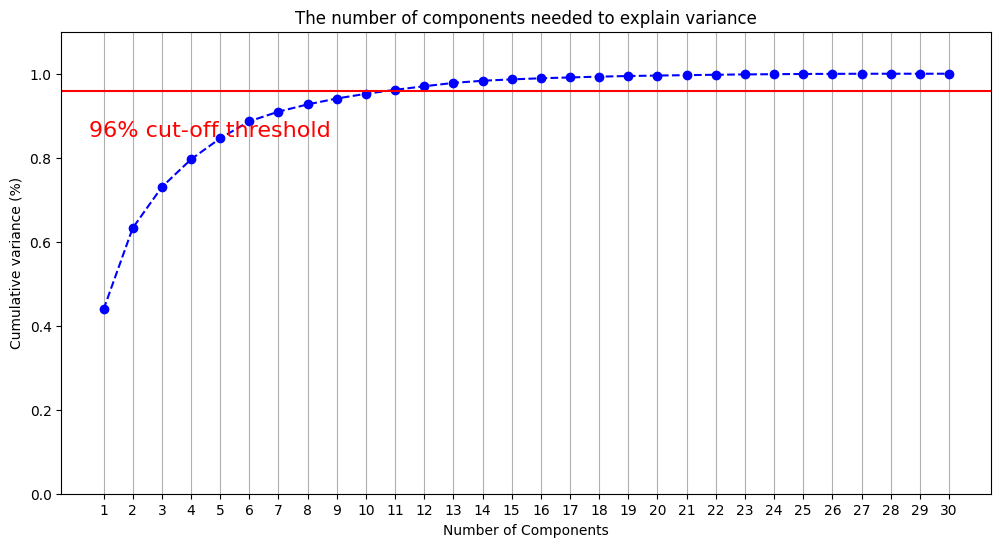

In [15]:
#Our input data consists of 30 features, and when we visualized the correlation between features, we observed a high correlation between them.
#This high correlation can increase the risk of overfitting, as the model might learn noise or specific patterns from the training data that
#do not generalize well to unseen data. To address this, we will use the PCA technique to reduce the number of features while retaining the
#most important information. PCA does not discard any existing features; instead, it combines them intelligently to create new features called
#"principal components." This approach enables us to reduce dimensionality while preserving the majority of the dataset's essential information,
#and we will evaluate how our model performs with this transformation.

from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(X)
plt.rcParams["figure.figsize"] = (12, 6)

fig, ax = plt.subplots()

xi = np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1))  # Start from 1
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.96, color='r', linestyle='-')
plt.text(0.5, 0.85, '96% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

Based on the plot, we can deduce that 11 components are required to reach the 96% cumulative variance, hence we apply PCA with 11 principal components

In [16]:
# Applying Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while
# retaining 96% of the variance. By specifying the number of components (n_components = 11), PCA transforms
# the original dataset (X) into a lower-dimensional space, resulting in a new dataset (X_pca) with reduced
# features. Also outputs the shape of the transformed dataset and the explained variance ratio
# for each principal component, which indicates the proportion of variance captured by each component.
# This process helps to mitigate overfitting and improve computational efficiency without significant loss
# of information.

from sklearn.decomposition import PCA
n_components = 11
# Apply PCA to retain 96% of the variance
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X)

print("Shape of X after PCA:", X_pca.shape)

explained_variance = pca.explained_variance_ratio_
explained_variance


Shape of X after PCA: (714, 11)


array([0.43876978, 0.1937284 , 0.09770079, 0.06598255, 0.04998236,
       0.04056766, 0.02300765, 0.01719269, 0.01405886, 0.01124793,
       0.00938104])

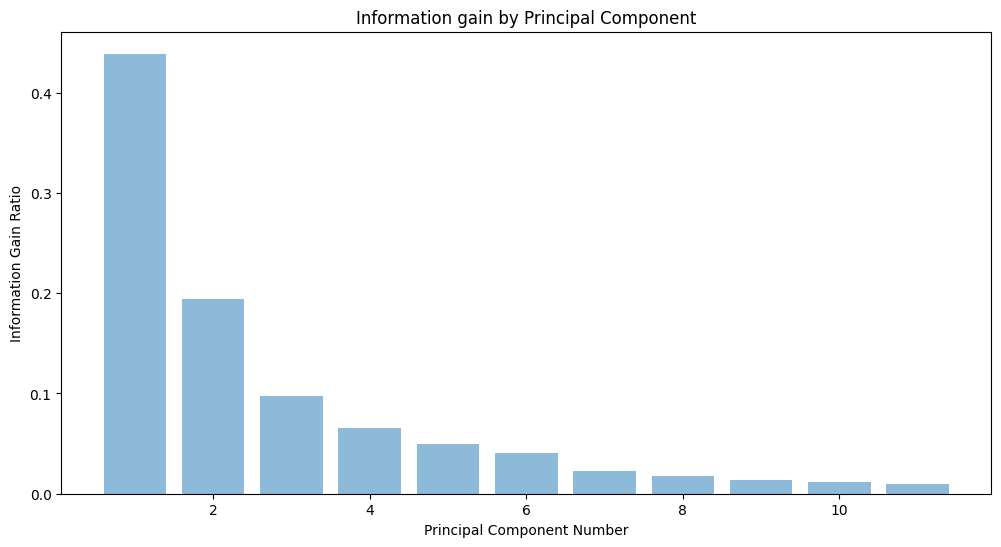

In [17]:
# Visualizing pca columns variances representing information gained
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.xlabel('Principal Component Number')
plt.ylabel('Information Gain Ratio')
plt.title('Information gain by Principal Component')
plt.show()

In [18]:
#Split the dataset into training and testing subsets.
# The test size is set to 20% of the dataset, and a random state ensures reproducibility of the split.

#Train and test data
from sklearn.model_selection import train_test_split

# Split the original dataset (without PCA)
X_train_without_pca, X_test_without_pca, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the PCA-transformed dataset
X_train_with_pca, X_test_with_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Output the shapes of the datasets
print("X_train_without_pca shape:", X_train_without_pca.shape)
print("X_test_without_pca shape:", X_test_without_pca.shape)
print("X_train_with_pca shape:", X_train_with_pca.shape)
print("X_test_with_pca shape:", X_test_with_pca.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_without_pca shape: (571, 30)
X_test_without_pca shape: (143, 30)
X_train_with_pca shape: (571, 11)
X_test_with_pca shape: (143, 11)
y_train shape: (571,)
y_test shape: (143,)


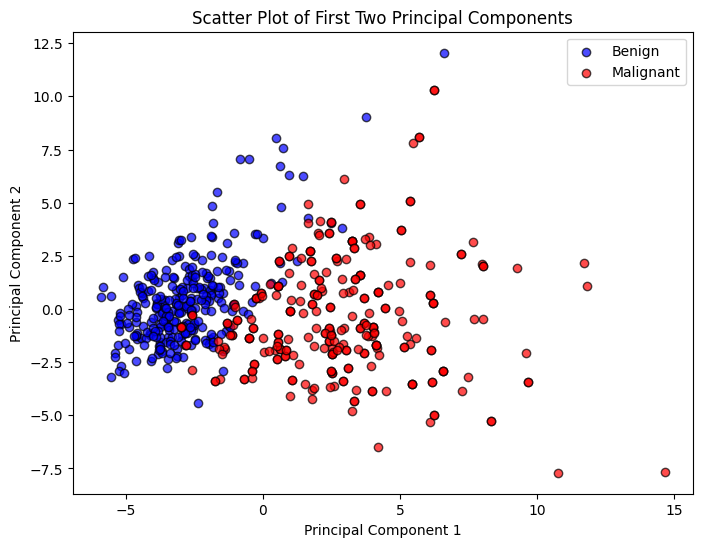

In [19]:
# This script visualizes the first two principal components obtained from PCA by creating a scatter plot
# that separates the data based on class labels (benign and malignant).
# - `pc1` and `pc2` represent the first and second principal components of the training data.
# - Each point's position in the plot reflects its projection onto the first two principal components.
# This visualization helps to explore the separability of the classes in the reduced feature space,
# providing insights into the effectiveness of PCA for dimensionality reduction in the given dataset.

pc1 = X_train_with_pca[:, 0]
pc2 = X_train_with_pca[:, 1]

# Separate data based on class labels
benign_indices = (y_train == 0)
malignant_indices = (y_train == 1)

# Scatter plot for benign class
plt.figure(figsize=(8, 6))
plt.scatter(pc1[benign_indices], pc2[benign_indices], c='blue', label='Benign', edgecolor='k', alpha=0.7)

# Scatter plot for malignant class
plt.scatter(pc1[malignant_indices], pc2[malignant_indices], c='red', label='Malignant', edgecolor='k', alpha=0.7)

# Add legend
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()

The division is not perfect because we selected only two principal components out of 11, but it's evident that the algorithm is starting to distinguish between benign cells and malignant cells. (each are grouped together)

# Model Selection / Regularization


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

def cross_validate_model(model, X_train, y_train, cv_strategy, scoring='accuracy'):
    """
    Perform cross-validation on a given model with a specified CV strategy.

    Parameters:
        model: The machine learning model to evaluate.
        X_train: Features of the training set.
        y_train: Labels of the training set.
        cv_strategy: Cross-validation strategy (e.g., KFold, StratifiedKFold).
        scoring: Scoring metric for evaluation (default is 'accuracy').

    Returns:
        mean_score: Mean of the cross-validation scores.
        fold_scores: List of scores for each fold.
    """
    fold_scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring=scoring)
    mean_score = fold_scores.mean()
    return mean_score, fold_scores

# Cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "XGBoost (with regularization)": XGBClassifier(alpha=0.1, reg_lambda=1.0, n_estimators=100, max_depth=5),
    "SVM": SVC(probability=True),
    "SVM (with regularization)": SVC(C=10, probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, random_state=42),
    "Decision Tree (with regularization)": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42),
}

# Cross-validation results
results_with_pca = {}
results_without_pca = {}

for model_name, model in models.items():
    # Without PCA
    mean_without_pca, scores_without_pca = cross_validate_model(model, X_train_without_pca, y_train, cv_strategy=kfold)
    results_without_pca[model_name] = (mean_without_pca, scores_without_pca)

    # With PCA
    mean_with_pca, scores_with_pca = cross_validate_model(model, X_train_with_pca, y_train, cv_strategy=kfold)
    results_with_pca[model_name] = (mean_with_pca, scores_with_pca)

# Print results
for model_name in models.keys():
    print(f"{model_name} (Without PCA) - Mean Accuracy: {results_without_pca[model_name][0]:.4f}, Scores: {results_without_pca[model_name][1]}")
    print(f"{model_name} (With PCA) - Mean Accuracy: {results_with_pca[model_name][0]:.4f}, Scores: {results_with_pca[model_name][1]}")


Random Forest (Without PCA) - Mean Accuracy: 0.9737, Scores: [0.96521739 0.98245614 0.96491228 0.98245614 0.97368421]
Random Forest (With PCA) - Mean Accuracy: 0.9614, Scores: [0.97391304 0.96491228 0.92105263 0.97368421 0.97368421]
XGBoost (Without PCA) - Mean Accuracy: 0.9737, Scores: [0.96521739 0.97368421 0.96491228 0.99122807 0.97368421]
XGBoost (With PCA) - Mean Accuracy: 0.9755, Scores: [0.97391304 0.99122807 0.94736842 0.98245614 0.98245614]
XGBoost (with regularization) (Without PCA) - Mean Accuracy: 0.9773, Scores: [0.96521739 0.98245614 0.96491228 0.99122807 0.98245614]
XGBoost (with regularization) (With PCA) - Mean Accuracy: 0.9755, Scores: [0.97391304 0.99122807 0.94736842 0.98245614 0.98245614]
SVM (Without PCA) - Mean Accuracy: 0.9685, Scores: [0.97391304 0.97368421 0.98245614 0.95614035 0.95614035]
SVM (With PCA) - Mean Accuracy: 0.9685, Scores: [0.96521739 0.98245614 0.98245614 0.95614035 0.95614035]
SVM (with regularization) (Without PCA) - Mean Accuracy: 0.9737, Sco

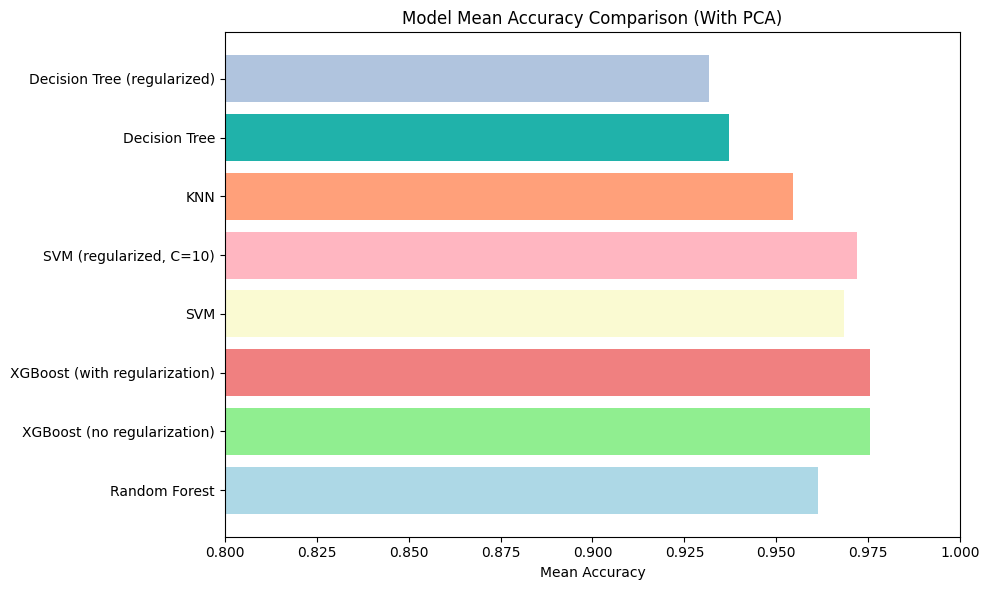

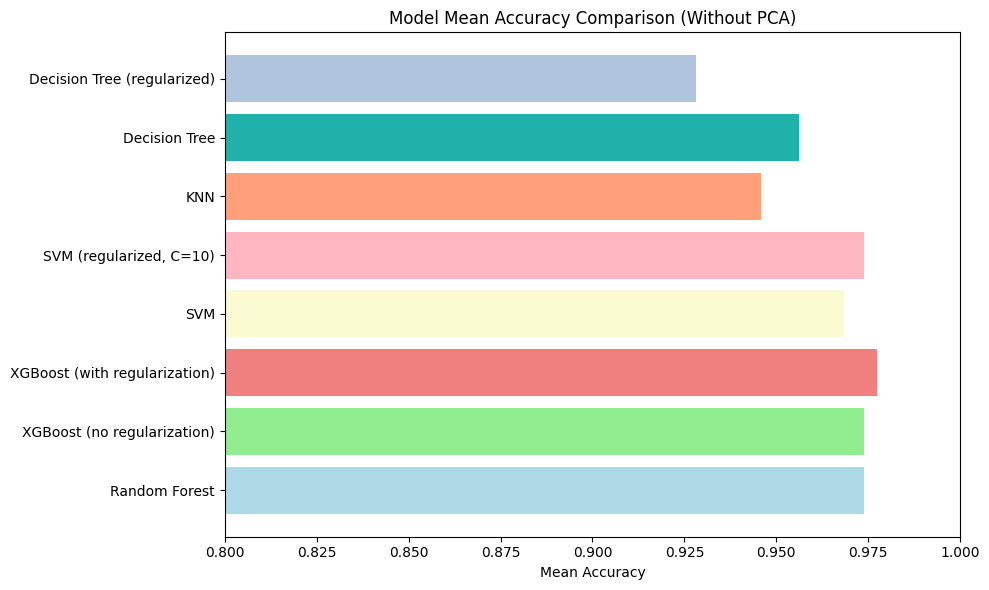

In [21]:
import matplotlib.pyplot as plt

# Models
models = [
    "Random Forest",
    "XGBoost (no regularization)",
    "XGBoost (with regularization)",
    "SVM",
    "SVM (regularized, C=10)",
    "KNN",
    "Decision Tree",
    "Decision Tree (regularized)"
]

# Mean accuracies for models with PCA
mean_accuracies_with_pca = [
    results_with_pca["Random Forest"][0],                # Random Forest
    results_with_pca["XGBoost"][0],                     # XGBoost (no regularization)
    results_with_pca["XGBoost (with regularization)"][0],# XGBoost (with regularization)
    results_with_pca["SVM"][0],                         # SVM
    results_with_pca["SVM (with regularization)"][0],     # SVM (regularized, C=10)
    results_with_pca["KNN"][0],                         # KNN
    results_with_pca["Decision Tree"][0],               # Decision Tree
    results_with_pca["Decision Tree (with regularization)"][0]    # Decision Tree (regularized)
]

# Mean accuracies for models without PCA
mean_accuracies_without_pca = [
    results_without_pca["Random Forest"][0],                # Random Forest
    results_without_pca["XGBoost"][0],                     # XGBoost (no regularization)
    results_without_pca["XGBoost (with regularization)"][0],# XGBoost (with regularization)
    results_without_pca["SVM"][0],                         # SVM
    results_without_pca["SVM (with regularization)"][0],     # SVM (regularized, C=10)
    results_without_pca["KNN"][0],                         # KNN
    results_without_pca["Decision Tree"][0],               # Decision Tree
    results_without_pca["Decision Tree (with regularization)"][0]    # Decision Tree (regularized)
]

# Colors for the bars
colors = [
    'lightblue',       # Random Forest
    'lightgreen',      # XGBoost (no regularization)
    'lightcoral',      # XGBoost (with regularization)
    'lightgoldenrodyellow',  # SVM
    'lightpink',       # SVM (regularized, C=10)
    'lightsalmon',     # KNN
    'lightseagreen',   # Decision Tree
    'lightsteelblue'   # Decision Tree (regularized)
]

# Plot for models with PCA
plt.figure(figsize=(10, 6))
plt.barh(models, mean_accuracies_with_pca, color=colors)
plt.xlim(0.8, 1.0)
plt.xlabel('Mean Accuracy')
plt.title('Model Mean Accuracy Comparison (With PCA)')
plt.tight_layout()
plt.show()

# Plot for models without PCA
plt.figure(figsize=(10, 6))
plt.barh(models, mean_accuracies_without_pca, color=colors)
plt.xlim(0.8, 1.0)
plt.xlabel('Mean Accuracy')
plt.title('Model Mean Accuracy Comparison (Without PCA)')
plt.tight_layout()
plt.show()


## Accuracy Before Balancing

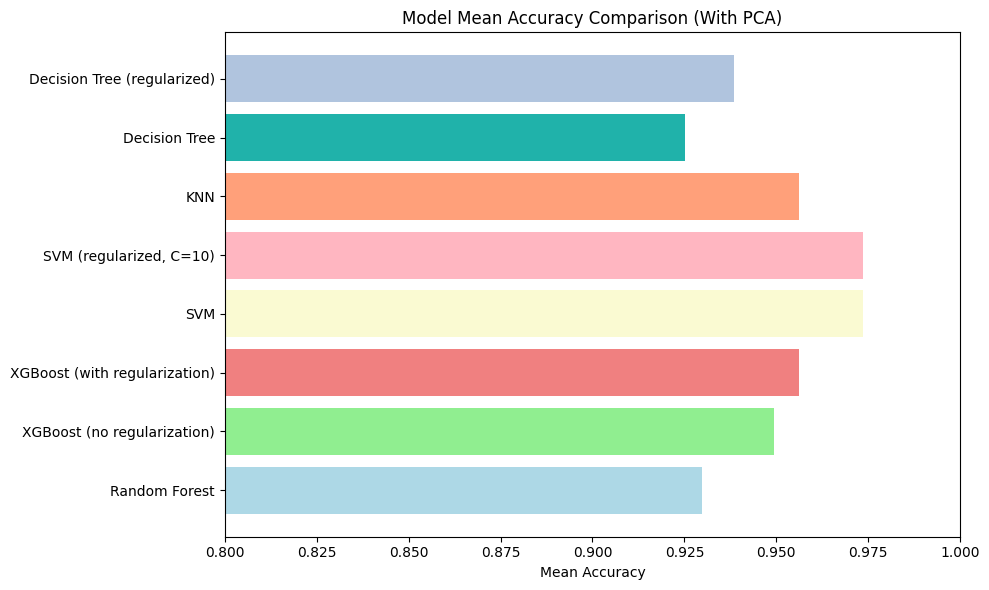

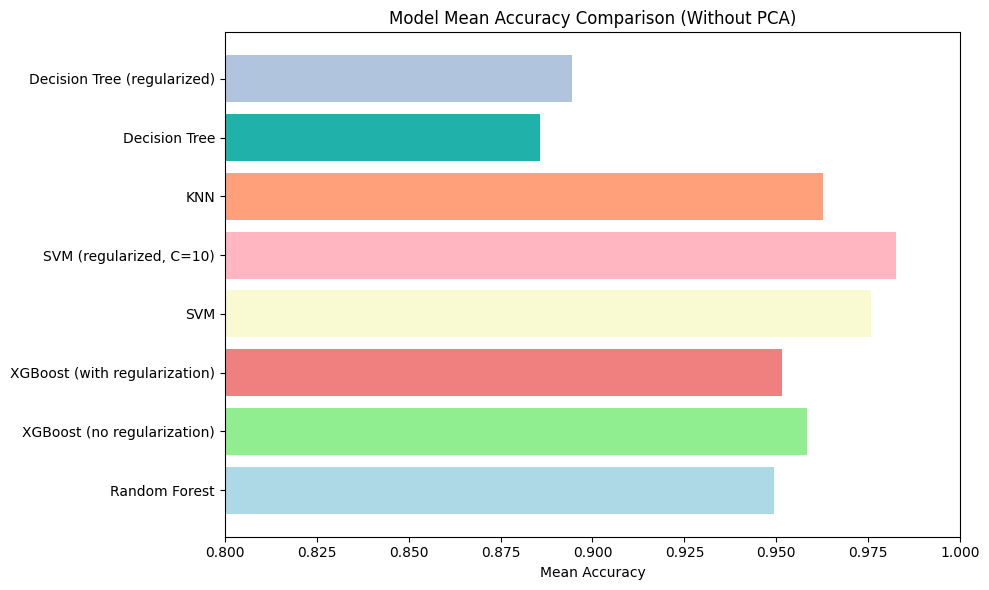

Before balancing the dataset SVM regularized had the highest accuracy but now after balancing we notice that XGBoost regularized has the highest accuracy
So we choose XGBoost without PCA and SVM without PCA

### Applying hyperparameter tuning on XGBoost

 performs hyperparameter tuning for an XGBoost classifier using GridSearchCV.
 The goal is to find the optimal set of hyperparameters for the model on the training dataset (without PCA).
 Key steps:
 1. Define a grid of hyperparameters (`param_grid_xgb`)
 2. Use GridSearchCV with 5-fold cross-validation to evaluate all combinations of hyperparameters.
 3. Fit the model to the training data and identify the best hyperparameters (`best_params_xgb`).
 4. Extract and display all tested hyperparameter combinations and their corresponding mean test scores.
 5. Sort the results by mean test scores in descending order for better readability.
 This process helps ensure the XGBoost classifier is optimized for performance on the given dataset.


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]
}

# Instantiate the XGBoost classifier
xgb_model = XGBClassifier()

# Instantiate GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5)

# Fit the model to the training data
grid_search_xgb.fit(X_train_without_pca, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Get all hyperparameter combinations and their respective scores
xgb_results = pd.DataFrame(grid_search_xgb.cv_results_)

# Extract relevant columns from the results
xgb_results = xgb_results[['param_learning_rate', 'param_n_estimators', 'param_max_depth', 'param_subsample', 'param_colsample_bytree', 'mean_test_score']]
xgb_results = xgb_results.sort_values(by='mean_test_score', ascending=False)

# Display the results in a table
print("\nBest Hyperparameters for XGBoost without PCA:", best_params_xgb)

print("Hyperparameter Tuning Results for XGBoost without PCA:")
xgb_results


Best Hyperparameters for XGBoost without PCA: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Hyperparameter Tuning Results for XGBoost without PCA:


,param_learning_rate,param_n_estimators,param_max_depth,param_subsample,param_colsample_bytree,mean_test_score
9,0.1,100,5,1.0,0.9,0.982487
33,0.1,100,5,1.0,1.0,0.982487
47,0.2,200,5,1.0,1.0,0.980732
45,0.2,100,5,1.0,1.0,0.980732
22,0.2,200,5,0.9,0.9,0.980732
11,0.1,200,5,1.0,0.9,0.980732
35,0.1,200,5,1.0,1.0,0.980732
20,0.2,100,5,0.9,0.9,0.980732
18,0.2,200,4,0.9,0.9,0.980732
3,0.1,200,3,1.0,0.9,0.978978


### Applying hyperparameter tuning on SVM

 Performs hyperparameter tuning for an SVM (Support Vector Machine) classifier using GridSearchCV.
 The goal is to find the best combination of hyperparameters for the SVM model on the training dataset (without PCA).
 Key steps:
 1. Define a parameter grid (`param_grid_svm`)
 2. Use GridSearchCV with 5-fold cross-validation to evaluate all hyperparameter combinations.
 3. Fit the GridSearchCV object to the training data to find the best hyperparameters (`best_params_svm`).
 4. Extract and display the results, including all hyperparameter combinations and their corresponding mean test scores.
 5. Sort the results by mean test scores in descending order for easy interpretation.
 This process ensures that the SVM classifier is optimized for the given dataset, improving its performance and generalization.


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Kernel type
    'gamma': ['scale', 'auto'],       # Kernel coefficient for RBF kernel
}

# Instantiate the SVM classifier
svm_model = SVC()

# Instantiate GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)

# Fit the model to the training data
grid_search_svm.fit(X_train_without_pca, y_train)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_

# Get all hyperparameter combinations and their respective scores
svm_results = pd.DataFrame(grid_search_svm.cv_results_)

# Extract relevant columns from the results
svm_results = svm_results[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']]
svm_results = svm_results.sort_values(by='mean_test_score', ascending=False)

# Display the results in a table
print("\nBest Hyperparameters for SVM:", best_params_svm)

print("Hyperparameter Tuning Results for SVM:")
print(svm_results)



Best Hyperparameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Hyperparameter Tuning Results for SVM:
    param_C param_kernel param_gamma  mean_test_score
9      10.0          rbf       scale         0.975500
11     10.0          rbf        auto         0.975500
0       0.1       linear       scale         0.968467
2       0.1       linear        auto         0.968467
5       1.0          rbf       scale         0.964958
7       1.0          rbf        auto         0.964958
4       1.0       linear       scale         0.959710
6       1.0       linear        auto         0.959710
8      10.0       linear       scale         0.957986
10     10.0       linear        auto         0.957986
1       0.1          rbf       scale         0.943936
3       0.1          rbf        auto         0.943936


### Comparing the best models

In [24]:
best_xgb_mean_test_score = grid_search_xgb.best_score_
best_svm_mean_test_score = grid_search_svm.best_score_


# Create DataFrames for the best models
best_xgb_df = pd.DataFrame({
    'Model': ['XGBoost without PCA'],
    'Mean Test Score': [best_xgb_mean_test_score]
})

best_svm_df = pd.DataFrame({
    'Model': ['SVM regularized without PCA'],
    'Mean Test Score': [best_svm_mean_test_score]
})

# Concatenate the DataFrames
comparison_df = pd.concat([best_xgb_df, best_svm_df], ignore_index=True)

# Display the comparison DataFrame
print("Model Comparison:")
comparison_df


Model Comparison:


,Model,Mean Test Score
0,XGBoost without PCA,0.982487
1,SVM regularized without PCA,0.975500


After performing hyperparameter tuning, we notice that XGBoost, with its optimal parameters, outperformed SVM algorithm, so we will proceed with XGBoost as our final model to evaluate the data of competition dataset.

In [25]:
final_model = XGBClassifier(**best_params_xgb)
final_model.fit(X_train_without_pca, y_train)
final_y_predicted = final_model.predict(X_test_without_pca)
final_accuracy = accuracy_score(y_test, final_y_predicted)
final_accuracy


0.986013986013986

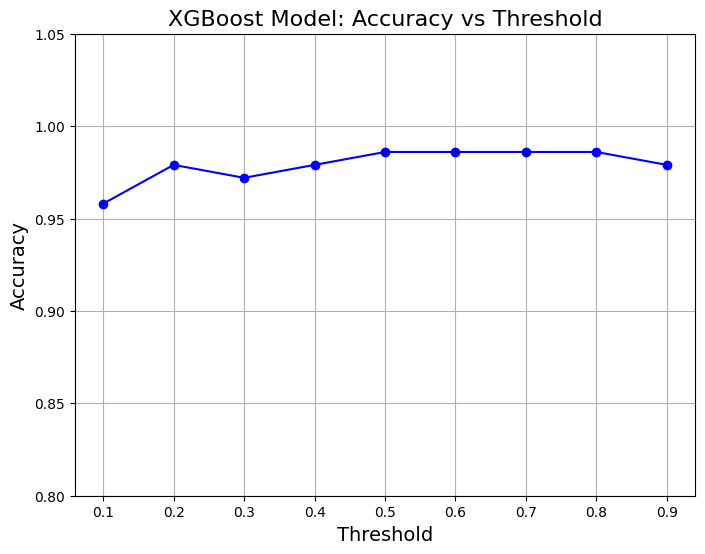

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

def adjust_threshold(y_probabilities, threshold):
    """
    Adjust the threshold for classification based on predicted probabilities.

    Parameters:
        y_probabilities: Predicted probabilities for the positive class.
        threshold: Custom threshold for classification.

    Returns:
        y_predicted: Predicted class labels based on the threshold.
    """
    return (y_probabilities[:, 1] > threshold).astype(int)


# Get predicted probabilities from the final model
y_predicted_proba = final_model.predict_proba(X_test_without_pca)

# Define a range of thresholds
thresholds = np.linspace(0.1, 0.9, 9)

# Store accuracies for each threshold
accuracies = []

# Calculate accuracy for each threshold
for threshold in thresholds:
    y_predicted = adjust_threshold(y_predicted_proba, threshold)
    accuracy = accuracy_score(y_test, y_predicted)
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracies, marker='o', color='b', linestyle='-', markersize=6)
plt.title("XGBoost Model: Accuracy vs Threshold", fontsize=16)
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid(True)

# Adjust the y-axis to ensure it reaches 1.0
plt.xticks(np.arange(0.1, 1.0, step=0.1))
plt.yticks(np.arange(0.8, 1.1, step=0.05))  # Adjusting to ensure it reaches 1.0
plt.ylim(0.8, 1.05)  # Ensuring the y-axis goes up to 1.05 for better clarity

plt.show()


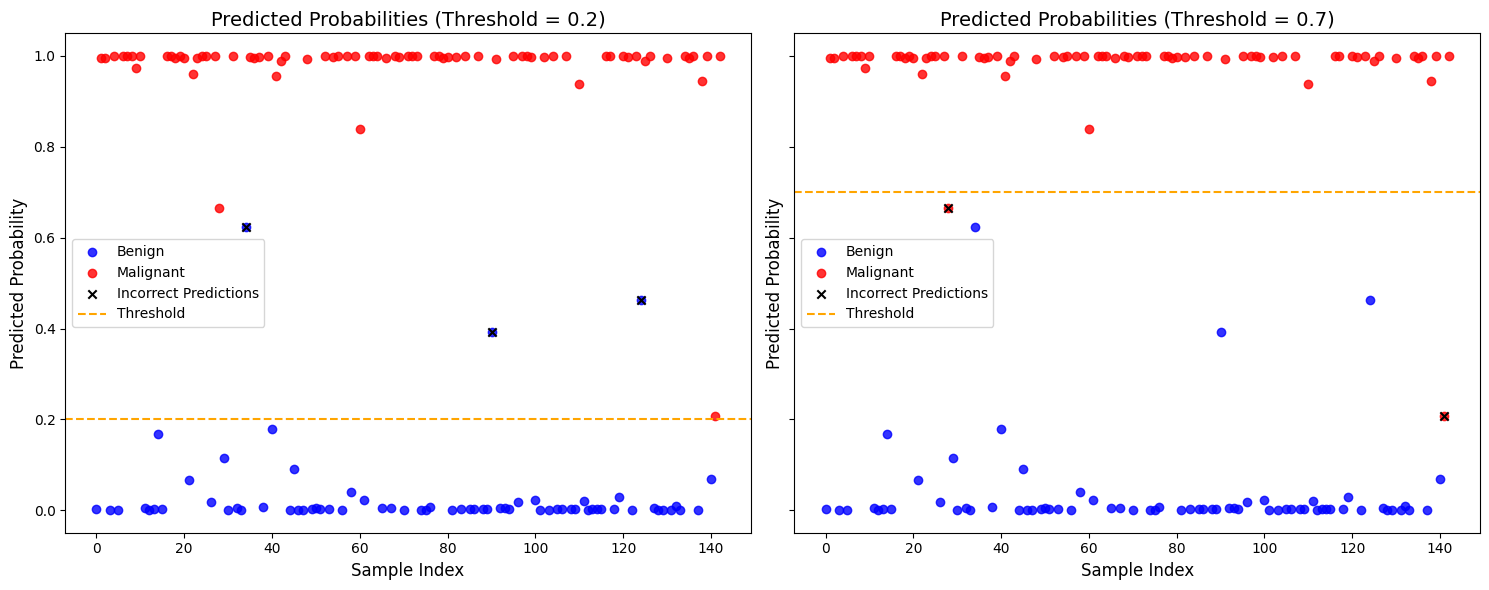

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

def adjust_threshold(y_probabilities, threshold):
    """
    Adjust the threshold for classification based on predicted probabilities.

    Parameters:
        y_probabilities: Predicted probabilities for the positive class.
        threshold: Custom threshold for classification.

    Returns:
        y_predicted: Predicted class labels based on the threshold.
    """
    return (y_probabilities[:, 1] > threshold).astype(int)

# Use the final XGBoost model with the best hyperparameters
final_model = XGBClassifier(**best_params_xgb)
final_model.fit(X_train_without_pca, y_train)

# Get predicted probabilities from the final model
y_predicted_proba = final_model.predict_proba(X_test_without_pca)

# Define thresholds for visualization
thresholds = [0.2, 0.7]

# Initialize the subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for each threshold
for i, threshold in enumerate(thresholds):
    y_predicted = adjust_threshold(y_predicted_proba, threshold)
    incorrect_predictions = (y_predicted != y_test).astype(int)

    # Plot predicted probabilities
    benign_indices = np.where(y_test == 0)[0]
    malignant_indices = np.where(y_test == 1)[0]

    axes[i].scatter(benign_indices, y_predicted_proba[benign_indices, 1], color='blue', label='Benign', alpha=0.8)
    axes[i].scatter(malignant_indices, y_predicted_proba[malignant_indices, 1], color='red', label='Malignant', alpha=0.8)

    # Highlight incorrect predictions
    incorrect_indices = np.where(incorrect_predictions == 1)[0]
    axes[i].scatter(incorrect_indices, y_predicted_proba[incorrect_indices, 1], color='black', label='Incorrect Predictions', marker='x')

    # Add threshold line
    axes[i].axhline(y=threshold, color='orange', linestyle='--', label='Threshold')

    # Add titles and labels
    axes[i].set_title(f"Predicted Probabilities (Threshold = {threshold})", fontsize=14)
    axes[i].set_xlabel("Sample Index", fontsize=12)
    axes[i].set_ylabel("Predicted Probability", fontsize=12)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


# Evaluation of the model

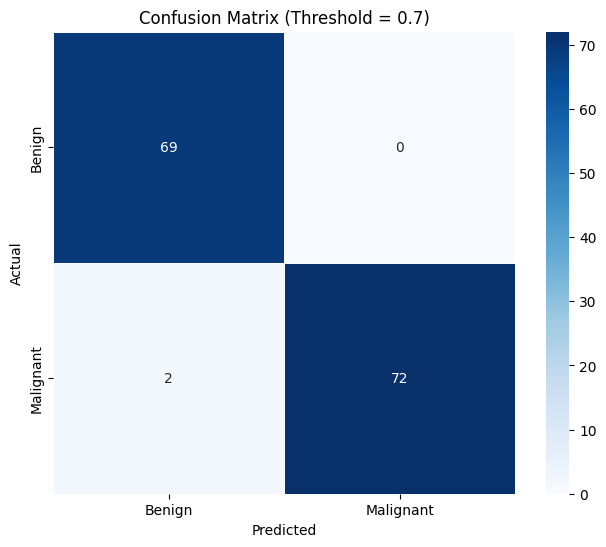

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

def adjust_threshold(y_probabilities, threshold):
    """
    Adjust the threshold for classification based on predicted probabilities.

    Parameters:
        y_probabilities: Predicted probabilities for the positive class.
        threshold: Custom threshold for classification.

    Returns:
        y_predicted: Predicted class labels based on the threshold.
    """
    return (y_probabilities[:, 1] > threshold).astype(int)

# Train the final XGBoost model
final_model = XGBClassifier(**best_params_xgb)
final_model.fit(X_train_without_pca, y_train)

# Get predicted probabilities
y_predicted_proba = final_model.predict_proba(X_test_without_pca)

# Define the threshold
threshold = 0.7

# Adjust predictions based on the threshold
y_predicted = adjust_threshold(y_predicted_proba, threshold)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')

plt.show()


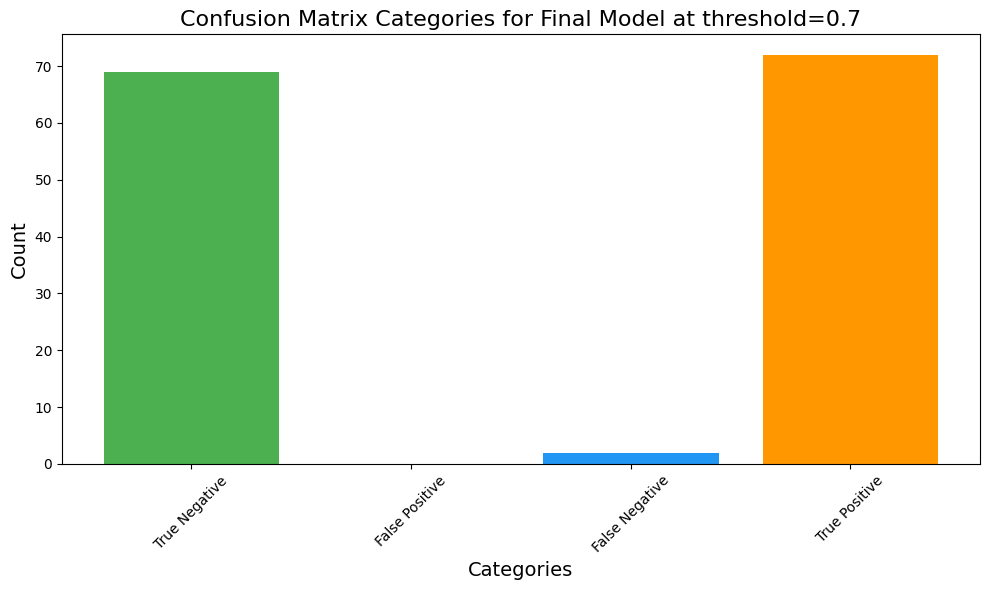

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Extract values from the confusion matrix
true_neg, false_pos, false_neg, true_pos = cm.ravel()

# Data for bar plot
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [true_neg, false_pos, false_neg, true_pos]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['#4CAF50', '#F44336', '#2196F3', '#FF9800'])

# Add labels and title
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Confusion Matrix Categories for Final Model at threshold=0.7', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout for clarity
plt.tight_layout()

# Display the plot
plt.show()


In [30]:
# Calculating precision, recall, f1, and accuracy, and visualizing them in a table
precision = precision_score(y_test, final_y_predicted)
recall = recall_score(y_test, final_y_predicted)
accuracy = accuracy_score(y_test, final_y_predicted)
f1 = f1_score(y_test, final_y_predicted)

results = {
    'Name': ['Precision', 'Recall', 'F1 Score', 'Accuracy'],
    'Value': [precision, recall, f1, accuracy]
}
# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)
results_df




,Name,Value
0,Precision,0.986486
1,Recall,0.986486
2,F1 Score,0.986486
3,Accuracy,0.986014


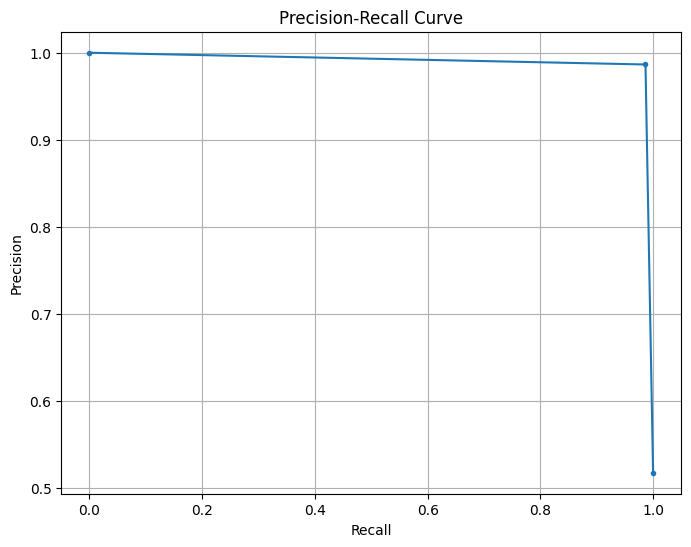

In [31]:
# Visualizing precision and recall using the precision-recall curve

# Calculate precision and recall values at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, final_y_predicted)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


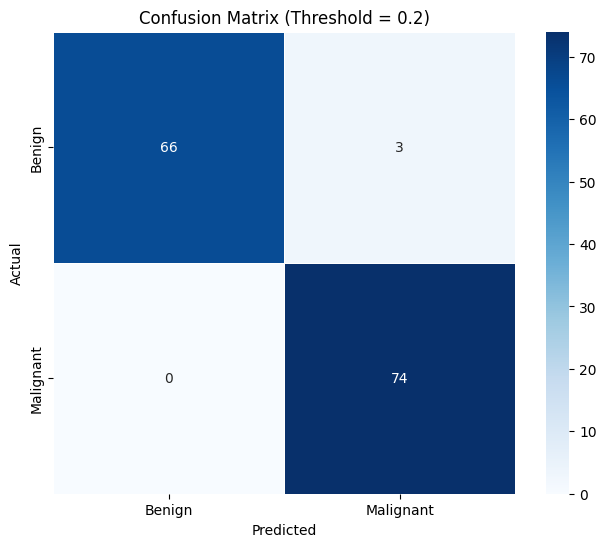

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

def adjust_threshold(y_probabilities, threshold):
    """
    Adjust the threshold for classification based on predicted probabilities.

    Parameters:
        y_probabilities: Predicted probabilities for the positive class.
        threshold: Custom threshold for classification.

    Returns:
        y_predicted: Predicted class labels based on the threshold.
    """
    return (y_probabilities[:, 1] > threshold).astype(int)

# Train the final XGBoost model
final_model = XGBClassifier(**best_params_xgb)
final_model.fit(X_train_without_pca, y_train)

# Get predicted probabilities
y_predicted_proba = final_model.predict_proba(X_test_without_pca)

# Define the threshold
threshold = 0.2

# Adjust predictions based on the threshold
y_predicted = adjust_threshold(y_predicted_proba, threshold)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')

plt.show()


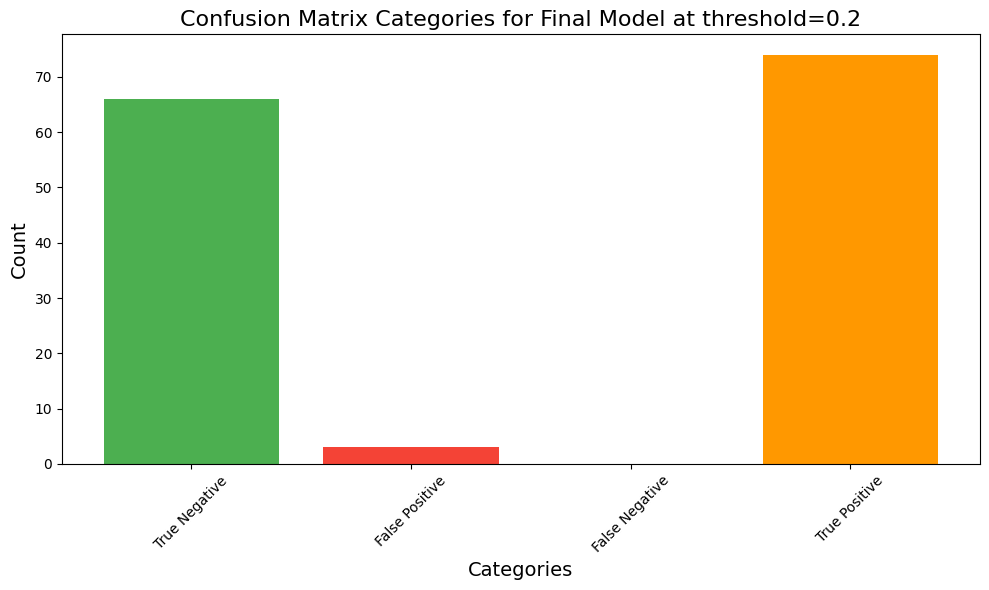

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Extract values from the confusion matrix
true_neg, false_pos, false_neg, true_pos = cm.ravel()

# Data for bar plot
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values = [true_neg, false_pos, false_neg, true_pos]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['#4CAF50', '#F44336', '#2196F3', '#FF9800'])

# Add labels and title
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Confusion Matrix Categories for Final Model at threshold=0.2', fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout for clarity
plt.tight_layout()

# Display the plot
plt.show()


## Conclusion
The XGBoost model proved to be the most effective, achieving high accuracy and robust generalization. Key takeaways include:
- Summary of Results: The model achieved 98.248% accuracy without PCA and demonstrated balanced precision and recall.
- Future Directions: Future work could focus on expanding the dataset, incorporating advanced techniques like deep learning, and employing interpretability tools  to enhance model transparency and clinical applicability.

# **Predicting competition data and visualizing results **

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load new data
new_data = pd.read_csv('WBCD2.csv')

# Step 2: Define a mapping between new column names and training feature names
column_mapping = {
    'radius_mean': 'radius1', 'texture_mean': 'texture1', 'perimeter_mean': 'perimeter1', 'area_mean': 'area1',
    'smoothness_mean': 'smoothness1', 'compactness_mean': 'compactness1', 'concavity_mean': 'concavity1',
    'concave points_mean': 'concave_points1', 'symmetry_mean': 'symmetry1', 'fractal_dimension_mean': 'fractal_dimension1',
    'radius_se': 'radius2', 'texture_se': 'texture2', 'perimeter_se': 'perimeter2', 'area_se': 'area2',
    'smoothness_se': 'smoothness2', 'compactness_se': 'compactness2', 'concavity_se': 'concavity2',
    'concave points_se': 'concave_points2', 'symmetry_se': 'symmetry2', 'fractal_dimension_se': 'fractal_dimension2',
    'radius_worst': 'radius3', 'texture_worst': 'texture3', 'perimeter_worst': 'perimeter3', 'area_worst': 'area3',
    'smoothness_worst': 'smoothness3', 'compactness_worst': 'compactness3', 'concavity_worst': 'concavity3',
    'concave points_worst': 'concave_points3', 'symmetry_worst': 'symmetry3', 'fractal_dimension_worst': 'fractal_dimension3'
}

# Step 3: Rename columns in new_data to match training feature names
new_data.rename(columns=column_mapping, inplace=True)

# Step 4: Retrieve the expected features from the scaler
expected_features = scaler.feature_names_in_

# Step 5: Reindex new_data to match the expected feature order
X_new = new_data.reindex(columns=expected_features)

# Step 6: Scale the new data using the same scaler
X_new_scaled = scaler.transform(X_new)

# Step 7: Predict using the final model
predictions = final_model.predict(X_new_scaled)

# Step 8: Display predictions
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [41]:



result_df = pd.DataFrame({
    'id': ids,  # Include original IDs
    'result':predictions
})


result_df['result'] = result_df['result'].replace({0: 'B', 1: 'M'})


result_df.to_csv('predictions.csv', index=False)


print("Predictions saved successfully:")
print(result_df)


Predictions saved successfully:
         id result
0    119513      M
1      8423      M
2    842517      M
3    843483      M
4    843584      M
..      ...    ...
193  942640      M
194  943471      M
195   94547      M
196  947204      M
197  947489      M

[198 rows x 2 columns]


In [42]:
import numpy as np

y_pred_proba_new = final_model.predict_proba(X_new_scaled)

# Initialize empty arrays for benign and malignant probabilities
benign_probabilities = []
malignant_probabilities = []

# Loop through each array in y_pred_proba_new
for prob_array in y_pred_proba_new:
    # Compare the first and second elements
    if prob_array[0] > prob_array[1]:
        # Add the first element to benign_probabilities
        benign_probabilities.append(prob_array[1])
    else:
        # Add the second element to malignant_probabilities
        malignant_probabilities.append(prob_array[1])


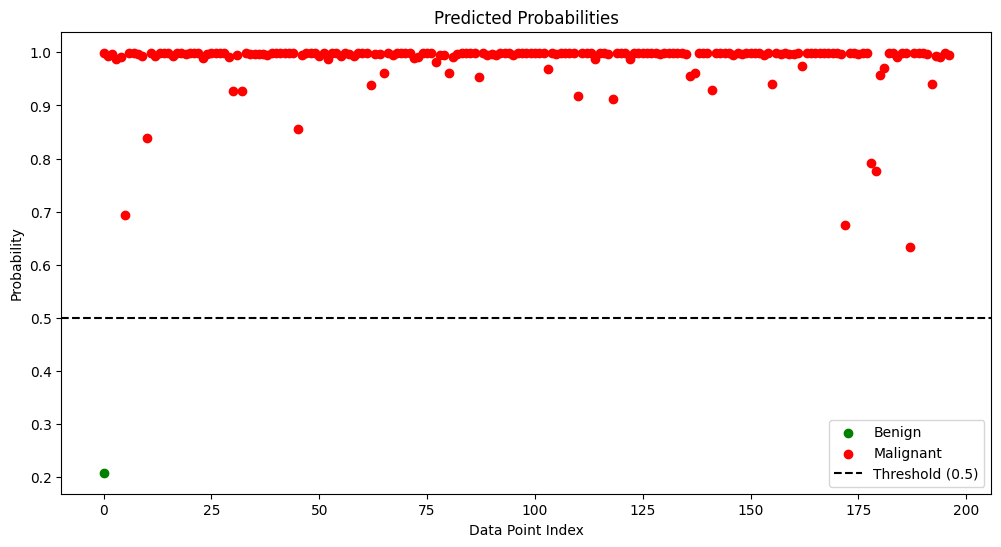

In [43]:
# Create a scatter plot
plt.scatter(range(len(benign_probabilities)), benign_probabilities, label='Benign', color='green')
plt.scatter(range(len(malignant_probabilities)), malignant_probabilities, label='Malignant', color='red')

# Draw a horizontal line at the threshold of 0.5
plt.axhline(y=0.5, color='black', linestyle='--', label='Threshold (0.5)')

# Customize the plot
plt.title('Predicted Probabilities')
plt.xlabel('Data Point Index')
plt.ylabel('Probability')
plt.legend()
plt.show()